<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/102/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com/stochastic-gradient-descent/stochastic-gradient-descent.zip
!unzip -qq stochastic-gradient-descent.zip
%cd stochastic-gradient-descent

--2023-01-31 09:21:03--  https://pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com/stochastic-gradient-descent/stochastic-gradient-descent.zip
Resolving pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com)... 52.92.146.106, 52.92.213.106, 3.5.80.168, ...
Connecting to pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3.us-west-2.amazonaws.com)|52.92.146.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2163 (2.1K) [application/zip]
Saving to: ‘stochastic-gradient-descent.zip’

stochastic-gradient 100%[===================>]   2.11K  --.-KB/s    in 0s      

2023-01-31 09:21:04 (129 MB/s) - ‘stochastic-gradient-descent.zip’ saved [2163/2163]

/content/stochastic-gradient-descent


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Gradient descent functions

In [7]:
def sigmoid_activation(x):
    # compute sigmoid activation value for input
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    # compute derivative of sigmoid function ASSUMING
    # input x is the output sigmoid activation value
    return x * (1 - x)

def predict(X, W):
    # take dot product between features and weight matrix
    preds = sigmoid_activation(X.dot(W))

    # apply step function to threshold outputs to binary
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1

    return preds

def next_batch(X, y, batch_size):
    # loop over dataset "X" in mini-batches,
    # yielding current batch data and labels
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [8]:
args = {
    "epochs": 100,
    "alpha": 0.01,
    "batch_size": 32
}

In [9]:
# generate a 2-class classification problem with 1000 data points
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1s as the last entry in feature matrix (bias trick)
X = np.c_[X, np.ones((X.shape[0]))]

# partition data
(train_x, test_x, train_y, test_y) = train_test_split(X, y, test_size=0.5, random_state=42)

# init weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [10]:
# loop over number of epochs
for epoch in np.arange(0, args["epochs"]):
    # init total loss for the epoch
    epoch_loss = []

    # loop over data in batches
    for (batch_x, batch_y) in next_batch(train_x, train_y, args["batch_size"]):
        # take dot product between features X and weight W
        # pass product to sigmoid activation, get predictions
        preds = sigmoid_activation(batch_x.dot(W))

        # compute error
        error = preds - batch_y
        epoch_loss.append(np.sum(error ** 2))

        # gradient descent update
        # dot product between features and error of sigmoid deriv of predictions
        d = error * sigmoid_deriv(preds)
        gradient = batch_x.T.dot(d)

        # nudge weight matrix in the negative direction of gradient
        W += -args["alpha"] * gradient

    # update loss history by taking average loss across all batches
    loss = np.average(epoch_loss)
    losses.append(loss)

    # check if update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print(f"[INFO] epoch={int(epoch+1)}, loss={loss:.5f}")


[INFO] epoch=1, loss=23.45195
[INFO] epoch=5, loss=15.96979
[INFO] epoch=10, loss=15.77182
[INFO] epoch=15, loss=15.71772
[INFO] epoch=20, loss=15.69072
[INFO] epoch=25, loss=15.67289
[INFO] epoch=30, loss=15.65886
[INFO] epoch=35, loss=15.64591
[INFO] epoch=40, loss=15.63024
[INFO] epoch=45, loss=15.58810
[INFO] epoch=50, loss=0.07354
[INFO] epoch=55, loss=0.01499
[INFO] epoch=60, loss=0.01144
[INFO] epoch=65, loss=0.01034
[INFO] epoch=70, loss=0.00982
[INFO] epoch=75, loss=0.00953
[INFO] epoch=80, loss=0.00932
[INFO] epoch=85, loss=0.00916
[INFO] epoch=90, loss=0.00903
[INFO] epoch=95, loss=0.00891
[INFO] epoch=100, loss=0.00880


[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



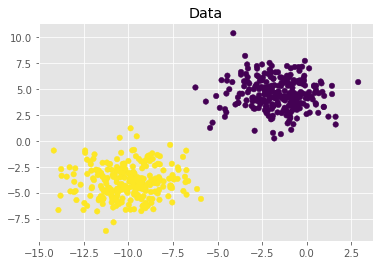

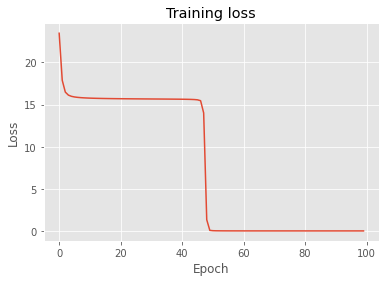

In [11]:
# evaluate model
print("[INFO] evaluating...")
preds = predict(test_x, W)
print(classification_report(test_y, preds))

# plot testing data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(test_x[:, 0], test_x[:, 1], marker="o", c=test_y[:, 0], s=30)

# figure that plots loss over time
plt.style.use("ggplot")
plt.figure()
plt.title("Training loss")
plt.plot(np.arange(0, args["epochs"]), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()